In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm  
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import shapiro,normaltest,kstest
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,accuracy_score
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV



# Data Gathering

In [2]:
df = pd.read_csv(r"E:\Datasets\advertising.csv")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# EDA(exploratory data analysis)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.shape

(200, 4)

In [5]:
df.isna().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [6]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


# Feature Engineering

In [7]:
## Outliers

In [8]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3-q1

lower_tail = q1-1.5*iqr
upper_tail = q3+1.5*iqr

outliers = (df<lower_tail) | (df>upper_tail)
outliers_count = outliers.sum()
print(outliers_count)

TV           0
Radio        0
Newspaper    2
Sales        0
dtype: int64


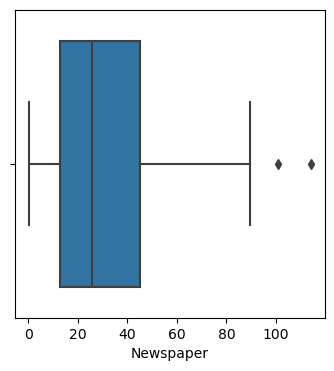

In [9]:
plt.figure(figsize=(4,4))  # Adjust the width and height as needed

sns.boxplot(x=df["Newspaper"])

plt.show()

In [10]:
## Handeling Outliers

-35.775000000000006
93.625


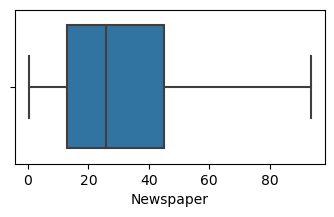

In [11]:
def Finding_outliar1(df,columns):
    for column in columns:
            q1 = df[column].quantile(0.25)
            q3 = df[column].quantile(0.75)
            iqr = q3 - q1

            lower_tail1 = q1 - 1.5 * iqr
            upper_tail1 = q3 + 1.5 * iqr
            print(lower_tail1)
            print(upper_tail1)
            
            df[column] = df[column].apply(lambda x : upper_tail1 if x > upper_tail1 else (lower_tail1 if x < lower_tail1 else x))
columns = ["Newspaper"]
Finding_outliar1(df,columns)

plt.figure(figsize=(4,2))
sns.boxplot(x=df["Newspaper"])
plt.show()


# Feature Selection

In [12]:
## linearity

<Axes: >

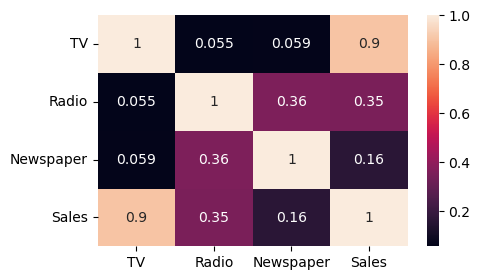

In [15]:
df.corr()
plt.figure(figsize=(5,3))
sns.heatmap(df.corr(),annot = True)

In [160]:
df1 = df.drop(["Sales"],axis =1)
df1

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [162]:
vif_df = pd.DataFrame()
vif_df["Features"] = df1.columns
vif_df

,Features
0,TV
1,Radio
2,Newspaper


In [164]:
vif_list = []
for i in range(df1.shape[1]):
    vif = variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list

[2.5004017799446303, 3.304735462292136, 3.1158159627360607]

In [166]:
vif_df["VIF"] = vif_list
vif_df

,Features,VIF
0,TV,2.500402
1,Radio,3.304735
2,Newspaper,3.115816


# Model Training

In [169]:
x = df.iloc[:,:3]
y = df["Sales"]
x

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [170]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=10)  

In [171]:
xtrain

,TV,Radio,Newspaper
190,39.5,41.1,5.8
7,120.2,19.6,11.6
26,142.9,29.3,12.6
138,43.0,25.9,20.5
58,210.8,49.6,37.7
...,...,...,...
113,209.6,20.6,10.7
64,131.1,42.8,28.9
15,195.4,47.7,52.9
125,87.2,11.8,25.9


In [68]:
## Model train

In [172]:
lin_reg = LinearRegression()
lin_reg

LinearRegression()

In [173]:
lin_reg_model = lin_reg.fit(xtrain,ytrain)
lin_reg_model

LinearRegression()

In [174]:
ytrain_predict = lin_reg_model.predict(xtrain)
ytrain_predict

array([11.37638643, 13.34604841, 15.61618156,  9.88749615, 21.42630338,
        9.79537747, 16.69949271, 18.14159826,  8.18682588, 13.76607964,
        9.47504141, 16.74605215, 24.48083182, 17.54301606, 18.02324879,
        7.84512476, 24.88236157, 18.72920938, 12.50291459,  9.59720267,
        7.543466  , 17.69355454, 16.90191357, 16.40201376, 18.29137015,
       20.48059032, 17.59660397, 14.02828725, 13.81488618,  9.15610543,
       15.21096523,  9.95943804, 10.35820984, 13.21081381, 16.50774934,
       17.88829835, 13.25167414,  9.81677988,  8.94945693, 17.85125335,
       11.75986626, 18.02393763, 10.11765136,  8.70761316, 18.60555126,
       19.21952296, 19.51699956, 17.14574787, 24.09059554, 16.67562604,
       11.20831566, 19.23707736, 10.98956252, 20.85745613, 20.6563923 ,
       10.25796548, 17.31892609, 18.81758909, 23.08590856, 21.61094925,
       14.10837135,  7.07967167, 12.45193683, 18.12290501, 16.57248486,
        8.2029806 , 16.94703173, 14.72207868, 10.00284157, 23.52

In [175]:
ytrain

190    10.8
7      13.2
26     15.0
138     9.6
58     23.8
       ... 
113    20.9
64     16.0
15     22.4
125    10.6
9      15.6
Name: Sales, Length: 160, dtype: float64

##### Normality to residual

In [176]:
residual_train = ytrain - ytrain_predict
residual_train

190   -0.576386
7     -0.146048
26    -0.616182
138   -0.287496
58     2.373697
         ...   
113    2.658542
64    -0.432024
15     2.026330
125   -0.110011
9     -0.141613
Name: Sales, Length: 160, dtype: float64

##### KDE plot

<Axes: xlabel='Sales', ylabel='Density'>

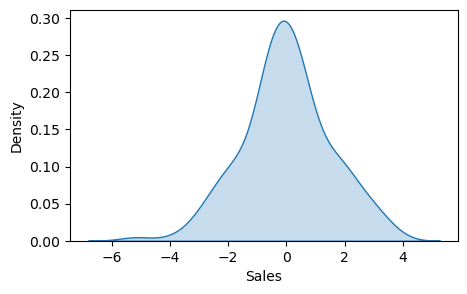

In [194]:
plt.figure(figsize=(5,3))
sns.kdeplot(residual_train,fill = True)


##### QQ plot

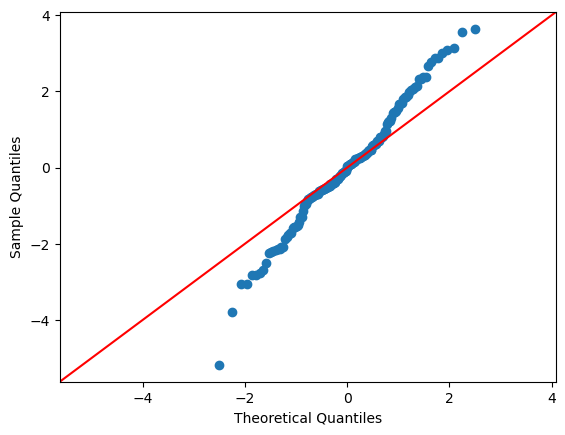

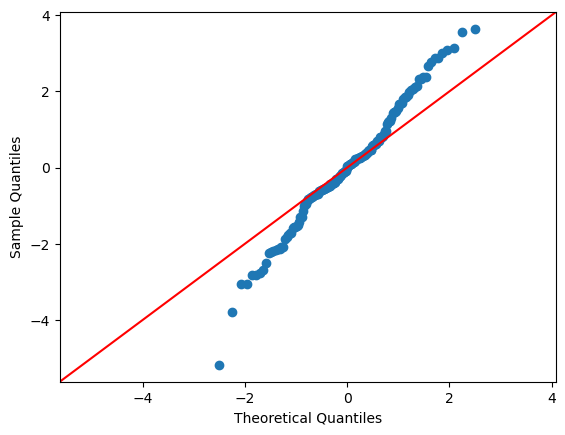

In [204]:

sm.qqplot(residual_train,line = "45")

##### Homoscadasticity

<Axes: ylabel='Sales'>

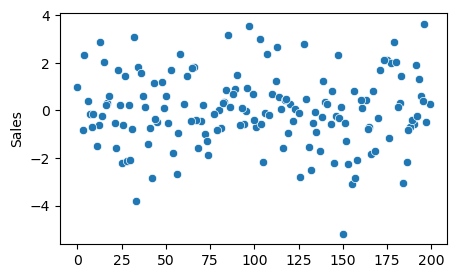

In [205]:
plt.figure(figsize=(5,3))
sns.scatterplot(residual_train)

# Model Evaluation

In [206]:
## training data

In [207]:
print("********Model Evaluation on training data*********")
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)
print(50*"*")

mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)
print(50*"*")

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print(50*"*")

r2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)
print(50*"*")


********Model Evaluation on training data*********
Mean squared Error =  2.280854171917676
**************************************************
Mean absolute Error =  1.1525070190490485
**************************************************
Root Mean squared Error =  1.5102497051539774
**************************************************
R2 score =  0.9070809730598617
**************************************************


In [208]:
mse
mae
r2score

0.9070809730598617

In [209]:
## testing data

In [210]:
ytest_predict = lin_reg_model.predict(xtest)

In [211]:
print("*********Model Evaluation on Testing Data*********")
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)
print(50*"*")

mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)
print(50*"*")

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print(50*"*")

r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)
print(50*"*")

*********Model Evaluation on Testing Data*********
Mean squared Error =  4.448552000846538
**************************************************
Mean absolute Error =  1.5748446762690163
**************************************************
Root Mean squared Error =  2.1091590743342565
**************************************************
R2 score =  0.8886698425689841
**************************************************


##### Decision tree regressor

In [212]:
DT = DecisionTreeRegressor()
DT

DecisionTreeRegressor()

In [213]:
DT_model = DT.fit(xtrain,ytrain)
DT_model

DecisionTreeRegressor()

In [214]:
ytrain_predict = DT_model.predict(xtrain)
ytrain_predict

array([10.8, 13.2, 15. ,  9.6, 23.8,  8.8, 19.7, 18.4,  5.5, 12.2,  9.7,
       17.9, 23.8, 18. , 17.5,  8.1, 27. , 18.3, 14. ,  9.7,  6.6, 18.4,
       16.9, 17.2, 19.6, 18.9, 16.9, 14.6, 13.4, 11. , 15.5, 10.1, 14. ,
       13.3, 17.2, 16.6, 13.6,  8. ,  9.4, 17.1, 11.8, 17.3, 13.2,  8.4,
       19.8, 17. , 21.2, 15. , 24.4, 17.3, 10.7, 19. , 11.3, 21.7, 17.6,
       10.5, 16.5, 20.5, 25.4, 20.9, 14.7,  6.7, 10.3, 17.3, 16.1,  5.7,
       20.5, 17.6, 11.9, 20.7,  9.7, 17.7, 11. , 16.4, 16.7, 10.4, 17.1,
        9.2, 17.1, 17.4,  5.6,  7.2, 20.2, 18.2, 11.8, 24.7, 10.1,  3.2,
       10.9, 20.7, 11.9,  5.3, 16.4, 10.8, 12.3, 10.3, 17.9, 19.6,  8.5,
       16.7, 20.2, 18.9, 11.6, 17.5, 15.5, 12.4, 15.9,  5.9, 14.8, 20.8,
       17. ,  8.7, 11.5, 11.6, 16.1, 16.7, 22.2, 11.3, 20.9, 25.4, 13.2,
       11.9, 11.3, 10.9, 16.7,  7.3, 21.4, 12. , 19.4, 19.2,  6.6, 16. ,
       13.7, 14.2, 17.2, 26.2, 17.4, 20.7, 16.6, 12. , 12.9, 20.2, 20.7,
       16.7, 12.5, 12.6, 11.9, 16.6, 22.1, 11. ,  4

In [215]:
ytrain

190    10.8
7      13.2
26     15.0
138     9.6
58     23.8
       ... 
113    20.9
64     16.0
15     22.4
125    10.6
9      15.6
Name: Sales, Length: 160, dtype: float64

In [216]:
print("********Model Evaluation on training data*********")
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)
print(50*"*")

mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)
print(50*"*")

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print(50*"*")

r2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)
print(50*"*")

********Model Evaluation on training data*********
Mean squared Error =  0.0
**************************************************
Mean absolute Error =  0.0
**************************************************
Root Mean squared Error =  0.0
**************************************************
R2 score =  1.0
**************************************************


In [217]:

mse
mae
r2score

1.0

In [218]:
ytest_predict = DT_model.predict(xtest)

In [219]:
print("*********Model Evaluation on Testing Data*********")
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)
print(50*"*")

mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)
print(50*"*")

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)
print(50*"*")

r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)
print(50*"*")

*********Model Evaluation on Testing Data*********
Mean squared Error =  3.37475
**************************************************
Mean absolute Error =  1.4125
**************************************************
Root Mean squared Error =  1.8370492644455674
**************************************************
R2 score =  0.9155429792168721
**************************************************


##### Hyperparameters

In [220]:
hyperparameters = {
    "criterion" : ["squared_error","absolute_error"],
    "max_depth" : np.arange(1,10),
    "min_samples_split" : np.arange(2,10),
    "min_samples_leaf" : np.arange(2,10),
}

In [221]:
### Gridsearch cv

In [222]:
grid_search_model = GridSearchCV(DT_model,hyperparameters,error_score= 'raise',cv =5)
grid_search_model

GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [223]:
grid_search_model.fit(xtrain,ytrain)


GridSearchCV(cv=5, error_score='raise', estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [224]:
grid_search_model.best_estimator_

DecisionTreeRegressor(criterion='absolute_error', max_depth=9,
                      min_samples_leaf=2)

In [225]:
hyper_dt_model = DecisionTreeRegressor(criterion = "absolute_error",max_depth = 5,min_samples_leaf=5)

In [226]:
hyper_dt_model.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=5,
                      min_samples_leaf=5)

In [227]:
### Training data

In [228]:
ytrain_predict1 = hyper_dt_model.predict(xtrain)
ytrain_predict1

array([10.45, 11.9 , 15.5 , 10.45, 22.4 ,  8.  , 17.1 , 17.6 ,  5.6 ,
       11.9 , 10.45, 17.1 , 25.4 , 18.8 , 17.6 ,  8.4 , 25.4 , 17.1 ,
       11.9 ,  8.4 ,  8.  , 17.6 , 17.1 , 17.1 , 18.8 , 19.35, 17.6 ,
       15.  , 11.9 , 10.45, 15.5 , 10.45, 11.9 , 13.75, 15.  , 17.1 ,
       15.  ,  8.  , 11.9 , 19.2 , 11.9 , 17.6 , 11.9 ,  8.4 , 19.35,
       17.6 , 18.8 , 15.  , 25.4 , 15.5 , 11.9 , 19.2 , 11.9 , 22.4 ,
       19.35, 11.9 , 18.8 , 19.35, 25.4 , 19.35, 15.  ,  8.  , 11.9 ,
       17.1 , 17.1 ,  5.6 , 17.1 , 17.1 , 11.9 , 20.7 , 10.45, 17.6 ,
       11.9 , 17.1 , 17.1 , 11.9 , 17.1 ,  8.  , 17.1 , 17.1 ,  5.6 ,
        8.  , 17.1 , 17.6 , 10.45, 22.4 , 10.45,  5.6 , 10.45, 20.7 ,
       11.9 ,  5.6 , 17.1 , 10.45, 11.9 , 11.9 , 17.1 , 19.2 ,  8.  ,
       17.1 , 20.7 , 19.35, 15.  , 17.1 , 15.5 , 11.9 , 13.75,  5.6 ,
       17.1 , 20.7 , 17.1 ,  8.4 , 11.9 , 11.9 , 19.35, 17.1 , 25.4 ,
       11.9 , 19.35, 25.4 , 11.9 , 11.9 , 11.9 , 11.9 , 15.  ,  5.6 ,
       20.7 , 11.9 ,

In [229]:
mse = mean_squared_error(ytrain,ytrain_predict)
print("Mean squared Error = ",mse)

mae = mean_absolute_error(ytrain,ytrain_predict)
print("Mean absolute Error = ",mae)

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)

r2score = r2_score(ytrain,ytrain_predict)
print("R2 score = ",r2score)


Mean squared Error =  0.0
Mean absolute Error =  0.0
Root Mean squared Error =  0.0
R2 score =  1.0


In [230]:
## Testing data 

In [231]:
ytest_predict1 = hyper_dt_model.predict(xtest)

In [232]:
mse = mean_squared_error(ytest,ytest_predict)
print("Mean squared Error = ",mse)

mae = mean_absolute_error(ytest,ytest_predict)
print("Mean absolute Error = ",mae)

rmse = np.sqrt(mse)
print("Root Mean squared Error = ",rmse)

r2score = r2_score(ytest,ytest_predict)
print("R2 score = ",r2score)


Mean squared Error =  3.37475
Mean absolute Error =  1.4125
Root Mean squared Error =  1.8370492644455674
R2 score =  0.9155429792168721
